In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Loading 2021 data...
Loading 2022 data...
Loading 2023 data...


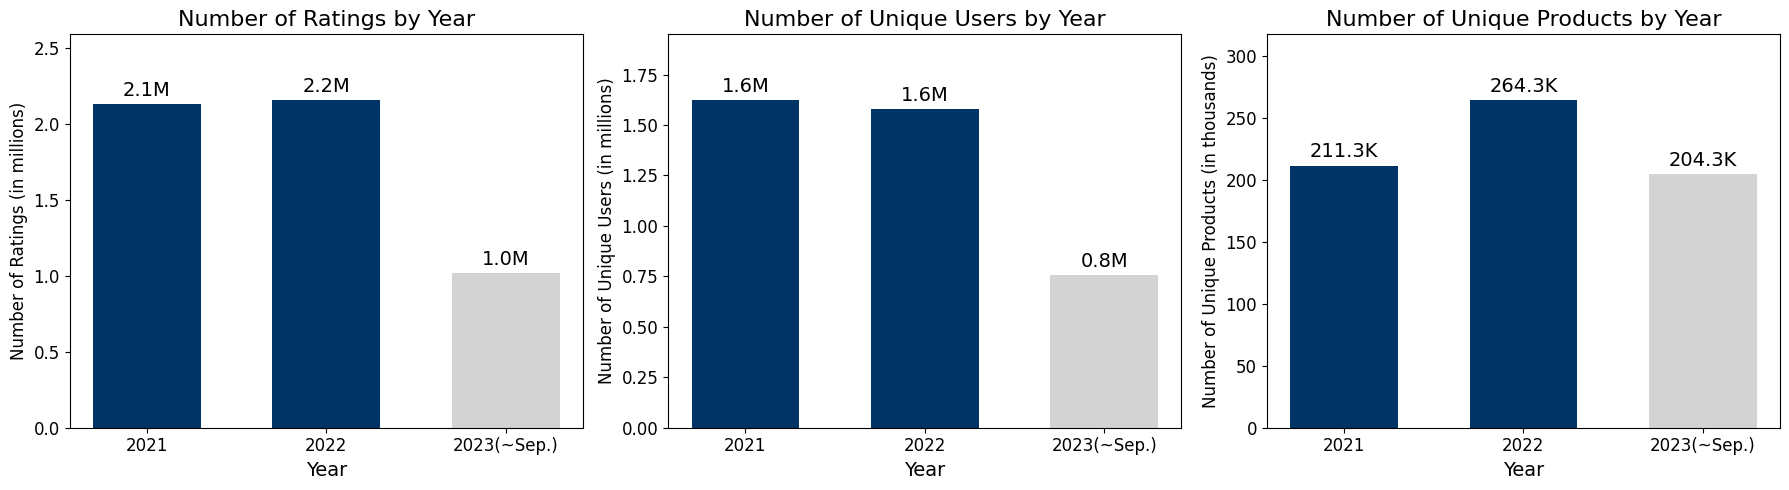

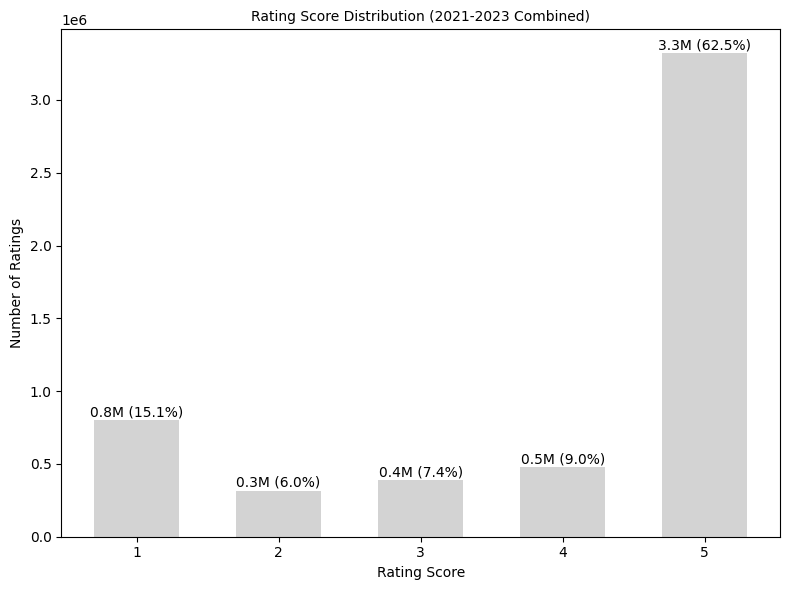

In [2]:
# Data Size and rating distribution

# File paths for the datasets
file_path_2021 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2021.parquet"
file_path_2022 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2022.parquet"
file_path_2023 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2023.parquet"

# Load only the necessary columns to reduce memory usage
necessary_columns = ['rating', 'user_id', 'asin']

print("Loading 2021 data...")
df_2021 = pd.read_parquet(file_path_2021, columns=necessary_columns)
print("Loading 2022 data...")
df_2022 = pd.read_parquet(file_path_2022, columns=necessary_columns)
print("Loading 2023 data...")
df_2023 = pd.read_parquet(file_path_2023, columns=necessary_columns)

# Extracting key metrics for each year
metrics_2021 = {
    "Year": "2021",
    "Number of Ratings": df_2021['rating'].count(),
    "Number of Unique Users": df_2021['user_id'].nunique(),
    "Number of Unique Products": df_2021['asin'].nunique()
}

metrics_2022 = {
    "Year": "2022",
    "Number of Ratings": df_2022['rating'].count(),
    "Number of Unique Users": df_2022['user_id'].nunique(),
    "Number of Unique Products": df_2022['asin'].nunique()
}

metrics_2023 = {
    "Year": "2023(~Sep.)",
    "Number of Ratings": df_2023['rating'].count(),
    "Number of Unique Users": df_2023['user_id'].nunique(),
    "Number of Unique Products": df_2023['asin'].nunique()
}

# Converting metrics to DataFrame
metrics_df = pd.DataFrame([metrics_2021, metrics_2022, metrics_2023])

# Converting user counts and rating counts to millions, product counts to thousands
metrics_df['Number of Ratings'] = metrics_df['Number of Ratings'] / 1_000_000
metrics_df['Number of Unique Users'] = metrics_df['Number of Unique Users'] / 1_000_000
metrics_df['Number of Unique Products'] = metrics_df['Number of Unique Products'] / 1_000

# Plotting side-by-side bar graphs for the metrics with thicker bars, lower height, and larger data labels
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define bar colors
bar_colors = ['#003366', '#003366', '#d3d3d3']  # dark blue for 2021-2022, gray for 2023

# Bar graph for the number of ratings
bars = axes[0].bar(metrics_df['Year'], metrics_df['Number of Ratings'], color=bar_colors, width=0.6)
axes[0].set_ylim(0, metrics_df['Number of Ratings'].max() * 1.2)
axes[0].set_title('Number of Ratings by Year', fontsize=16)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Number of Ratings (in millions)', fontsize=12)
axes[0].tick_params(axis='both', labelsize=12)
axes[0].bar_label(bars, labels=[f'{x:.1f}M' for x in metrics_df['Number of Ratings']], padding=3, fontsize=14)
plt.savefig("number_of_ratings_by_year.jpg", format="jpg")

# Bar graph for the number of unique users
bars = axes[1].bar(metrics_df['Year'], metrics_df['Number of Unique Users'], color=bar_colors, width=0.6)
axes[1].set_ylim(0, metrics_df['Number of Unique Users'].max() * 1.2)
axes[1].set_title('Number of Unique Users by Year', fontsize=16)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Number of Unique Users (in millions)', fontsize=12)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].bar_label(bars, labels=[f'{x:.1f}M' for x in metrics_df['Number of Unique Users']], padding=3, fontsize=14)
plt.savefig("number_of_unique_users_by_year.jpg", format="jpg")

# Bar graph for the number of unique products
bars = axes[2].bar(metrics_df['Year'], metrics_df['Number of Unique Products'], color=bar_colors, width=0.6)
axes[2].set_ylim(0, metrics_df['Number of Unique Products'].max() * 1.2)
axes[2].set_title('Number of Unique Products by Year', fontsize=16)
axes[2].set_xlabel('Year', fontsize=14)
axes[2].set_ylabel('Number of Unique Products (in thousands)', fontsize=12)
axes[2].tick_params(axis='both', labelsize=12)
axes[2].bar_label(bars, labels=[f'{x:.1f}K' for x in metrics_df['Number of Unique Products']], padding=3, fontsize=14)
plt.savefig("number_of_unique_products_by_year.jpg", format="jpg")

# Adjust layout
plt.tight_layout()
plt.show()

# Rating Score Distribution

# Combine all datasets to analyze rating distribution
df_combined = pd.concat([df_2021, df_2022, df_2023])

# Calculate the rating distribution
rating_counts = df_combined['rating'].value_counts().sort_index()

# Plotting the bar graph for rating distribution
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(rating_counts.index, rating_counts, color='#d3d3d3', width=0.6)  # gray color

# Add data labels (count and percentage) above each bar, formatted in millions with one decimal
for bar in bars:
    yval = bar.get_height() / 1_000_000  
    percentage = (bar.get_height() / rating_counts.sum()) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5000, f'{yval:.1f}M ({percentage:.1f}%)', 
            ha='center', va='bottom', fontsize=10)  

# Labels and title
ax.set_xlabel('Rating Score', fontsize=10)
ax.set_ylabel('Number of Ratings', fontsize=10)
ax.set_title('Rating Score Distribution (2021-2023 Combined)', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

# Save as JPG
plt.savefig("rating_score_distribution.jpg", format="jpg")

plt.tight_layout()
plt.show()


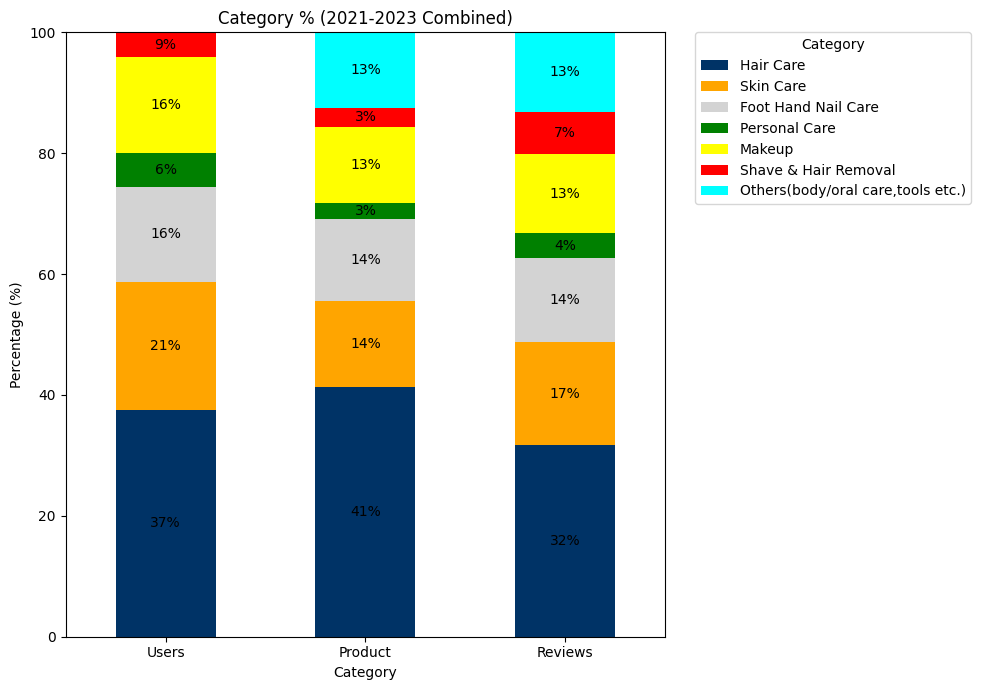

In [7]:
#. Category Composition

# File paths for the 2021, 2022, and 2023 datasets
file_path_2021 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2021.parquet"
file_path_2022 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2022.parquet"
file_path_2023 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2023.parquet"

# Load only the necessary columns (rating, user_id, asin, and category columns)
necessary_columns = ['rating', 'user_id', 'asin', 'Hair Care', 'Skin Care', 'Foot Hand Nail Care', 
                     'Personal Care', 'Makeup', 'Shave & Hair Removal', 'Body Care', 'Oral Care', 'Tools & Accessories']

# Load the data from the 2021, 2022, and 2023 files
df_2021 = pd.read_parquet(file_path_2021, columns=necessary_columns)
df_2022 = pd.read_parquet(file_path_2022, columns=necessary_columns)
df_2023 = pd.read_parquet(file_path_2023, columns=necessary_columns)

# Combine data from all years
df_combined = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

# Define the category columns to calculate their sums
category_columns = ['Hair Care', 'Skin Care', 'Foot Hand Nail Care', 'Personal Care', 'Makeup', 'Shave & Hair Removal']

# Calculate total number of reviews (total rows)
total_reviews = df_combined['rating'].count()

# Calculate total number of users and products
total_users = df_combined['user_id'].nunique()
total_products = df_combined['asin'].nunique()

# Calculate the sum of each category (number of reviews in each category)
category_sums = df_combined[category_columns].sum()

# 'Others' category: Calculate the sum of Body Care, Oral Care, Tools & Accessories and the remaining ratings
others_reviews = total_reviews - category_sums.sum()
category_sums['Others(body/oral care,tools etc.)'] = others_reviews

# Calculate the user and product counts for each category (if a user/product has reviewed any product in the category, it is counted)
user_sums = df_combined.groupby('user_id')[category_columns].max().sum()
user_sums['Others(body/oral care,tools etc.)'] = total_users - user_sums.sum()

product_sums = df_combined.groupby('asin')[category_columns].max().sum()
product_sums['Others(body/oral care,tools etc.)'] = total_products - product_sums.sum()

# Calculate the percentage for each category
review_percent = (category_sums / total_reviews) * 100
user_percent = (user_sums / total_users) * 100
product_percent = (product_sums / total_products) * 100

# Create a DataFrame to hold the percentages
percent_df = pd.DataFrame({
    'Users': user_percent,
    'Product': product_percent,
    'Reviews': review_percent
})

# Move the 'Others' category to the last row
percent_df = percent_df.reindex(['Hair Care', 'Skin Care', 'Foot Hand Nail Care', 'Personal Care', 
                                 'Makeup', 'Shave & Hair Removal', 'Others(body/oral care,tools etc.)'])

# Plotting the accumulated (stacked) bar graph
fig, ax = plt.subplots(figsize=(10, 7))

# Define colors for the categories, updating dark blue and gray as requested
colors = ['#003366', 'orange', '#d3d3d3', 'green', 'yellow', 'red', 'cyan']

# Plot the stacked bar chart
percent_df.T.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Add data labels, excluding 0% values
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f%%', labels=[f'{w:.0f}%' if w > 0 else '' for w in container.datavalues])

# Set X-axis labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")

# Set labels and title
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Category')
ax.set_title('Category % (2021-2023 Combined)')
ax.set_ylim(0, 100)

# Move the legend outside the plot (to the right)
ax.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()



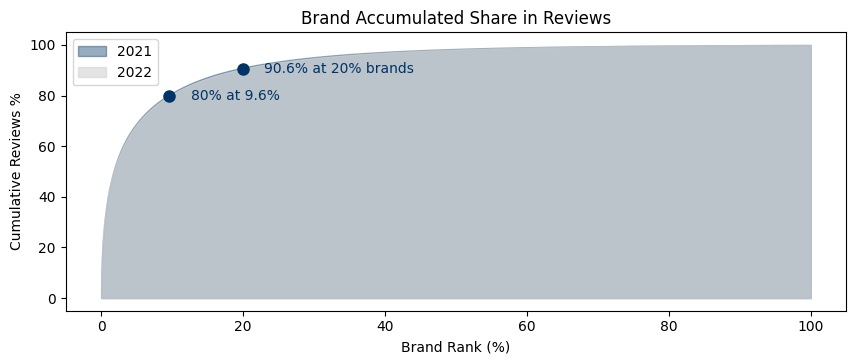

In [8]:
#. Brand Accumulated Share

# File paths for the 2021 and 2022 datasets
file_path_2021 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2021.parquet"
file_path_2022 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2022.parquet"

# Load only the necessary columns for 2021 and 2022
necessary_columns = ['brand', 'rating']
df_2021 = pd.read_parquet(file_path_2021, columns=necessary_columns)
df_2022 = pd.read_parquet(file_path_2022, columns=necessary_columns)

# Function to calculate the cumulative percentage of ratings by brand
def cumulative_rating_percentage(df):
    brand_ratings = df.groupby('brand')['rating'].sum().sort_values(ascending=False)
    cumulative_sum = brand_ratings.cumsum()
    total_ratings = brand_ratings.sum()
    cumulative_percentage = (cumulative_sum / total_ratings) * 100
    cumulative_percentage = cumulative_percentage.reset_index()
    return cumulative_percentage

# Calculate cumulative rating percentages for 2021 and 2022
cumulative_2021 = cumulative_rating_percentage(df_2021)
cumulative_2022 = cumulative_rating_percentage(df_2022)

# X-axis values as percentages
x_values_2021 = [i / len(cumulative_2021) * 100 for i in range(1, len(cumulative_2021) + 1)]
x_values_2022 = [i / len(cumulative_2022) * 100 for i in range(1, len(cumulative_2022) + 1)]

# Plotting the area charts with optimized settings
fig, ax = plt.subplots(figsize=(22/2.54, 9.5/2.54))  # Convert cm to inches

# Fill the cumulative rating percentage for 2021 and 2022 with specified colors
ax.fill_between(x_values_2021, cumulative_2021['rating'], color='#003366', alpha=0.4, label='2021')
ax.fill_between(x_values_2022, cumulative_2022['rating'], color='#d3d3d3', alpha=0.6, label='2022')

# X-axis labels: set ticks at 20% intervals
ax.set_xticks(range(0, 101, 20))

# Add labels and title
ax.set_xlabel('Brand Rank (%)')
ax.set_ylabel('Cumulative Reviews %')
ax.set_title('Brand Accumulated Share in Reviews')

# Display the legend
ax.legend(loc='upper left')

# Highlight the point where y-axis is at 80% and x-axis is at 20% for 2022
y_80_idx = cumulative_2022[cumulative_2022['rating'] >= 80].index[0]
x_20_idx = int(len(cumulative_2022) * 0.2)

# Plot large points at the specified coordinates and annotate with data labels in dark blue
ax.plot(x_values_2022[y_80_idx], cumulative_2022['rating'][y_80_idx], 'o', color='#003366', markersize=8)
ax.annotate(f'80% at {x_values_2022[y_80_idx]:.1f}%', 
            xy=(x_values_2022[y_80_idx], cumulative_2022['rating'][y_80_idx]), 
            xytext=(x_values_2022[y_80_idx] + 3, cumulative_2022['rating'][y_80_idx]),
            fontsize=10, color='#003366', va='center')

ax.plot(x_values_2022[x_20_idx], cumulative_2022['rating'][x_20_idx], 'o', color='#003366', markersize=8)
ax.annotate(f'{cumulative_2022["rating"][x_20_idx]:.1f}% at 20% brands', 
            xy=(x_values_2022[x_20_idx], cumulative_2022['rating'][x_20_idx]), 
            xytext=(x_values_2022[x_20_idx] + 3, cumulative_2022['rating'][x_20_idx]),
            fontsize=10, color='#003366', va='center')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


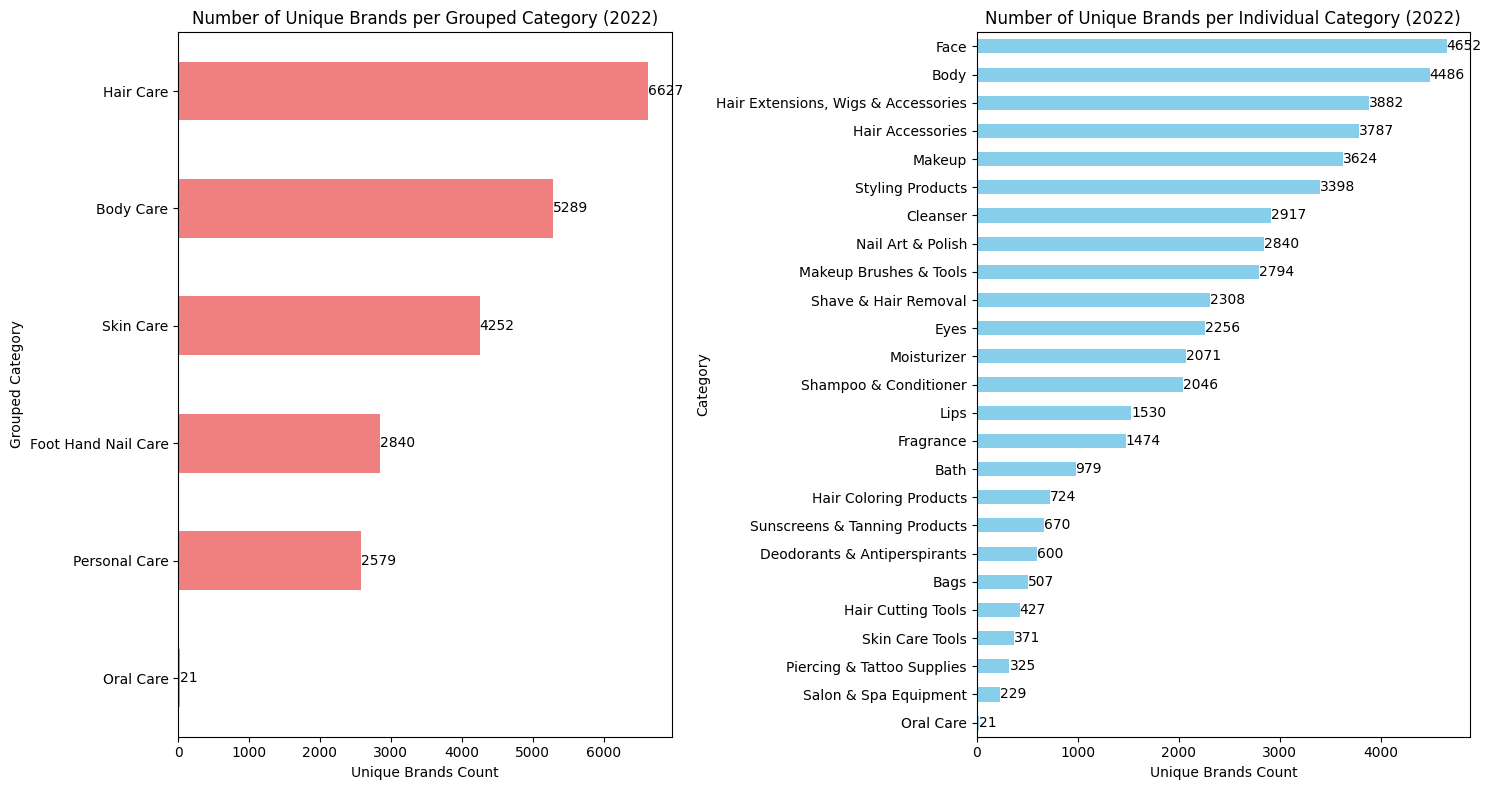

In [1]:
#No. of brands by category

# Define the file path for the 2022 data
file_path = r"C:\Users\seony\Desktop\DA Group\beauty_merged_2022.parquet"

# List of individual categories to analyze
columns_to_check = [
    "Makeup", "Nail Art & Polish", "Hair Extensions, Wigs & Accessories", "Face", "Styling Products", 
    "Shave & Hair Removal", "Body", "Eyes", "Makeup Brushes & Tools", "Fragrance", 
    "Hair Accessories", "Cleanser", "Shampoo & Conditioner", "Lips", "Moisturizer", 
    "Deodorants & Antiperspirants", "Sunscreens & Tanning Products", "Hair Coloring Products", 
    "Bath", "Hair Cutting Tools", "Bags", "Skin Care Tools", "Piercing & Tattoo Supplies", 
    "Salon & Spa Equipment", "Oral Care"
]

# List of grouped categories for the second graph
grouped_categories = {
    "Hair Care": ["Shampoo & Conditioner", "Hair Coloring Products", "Hair Accessories", "Hair Cutting Tools"],
    "Skin Care": ["Cleanser", "Moisturizer"],
    "Foot Hand Nail Care": ["Nail Art & Polish"],
    "Personal Care": ["Deodorants & Antiperspirants", "Sunscreens & Tanning Products", "Fragrance"],
    "Body Care": ["Bath", "Body"],
    "Oral Care": ["Oral Care"]
}

# Load the relevant columns (brand and all categories) from the 2022 file
relevant_columns = ['brand'] + columns_to_check
df = pd.read_parquet(file_path, columns=relevant_columns)

# Initialize a dictionary to store the number of unique brands per individual category
category_brand_counts = {}

# Loop through each category to count the unique brands
for category in columns_to_check:
    # Filter data where the category column is 1
    category_data = df[df[category] == 1]
    
    # Count the number of unique brands in this filtered data
    unique_brands_count = category_data['brand'].nunique()
    
    # Store the count in the dictionary
    category_brand_counts[category] = unique_brands_count

# Convert the dictionary to a DataFrame for better readability
category_brand_counts_df = pd.DataFrame.from_dict(category_brand_counts, orient='index', columns=['Unique Brands Count'])

# Calculate the unique brands for each grouped category
grouped_brand_counts = {}
for group, subcategories in grouped_categories.items():
    unique_brands = df[df[subcategories].sum(axis=1) > 0]['brand'].nunique()  # Count brands across subcategories
    grouped_brand_counts[group] = unique_brands

# Convert the grouped dictionary to a DataFrame
grouped_brand_counts_df = pd.DataFrame.from_dict(grouped_brand_counts, orient='index', columns=['Unique Brands Count'])

# Plotting the two graphs side by side with swapped positions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Plotting grouped categories (left side)
grouped_brand_counts_df.sort_values(by='Unique Brands Count', ascending=True).plot(
    kind='barh', legend=False, ax=ax1, color='lightcoral')
ax1.set_title('Number of Unique Brands per Grouped Category (2022)')
ax1.set_xlabel('Unique Brands Count')
ax1.set_ylabel('Grouped Category')

# Add data labels to each bar in the left graph
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge')

# Plotting individual categories (right side)
category_brand_counts_df.sort_values(by='Unique Brands Count', ascending=True).plot(
    kind='barh', legend=False, ax=ax2, color='skyblue')
ax2.set_title('Number of Unique Brands per Individual Category (2022)')
ax2.set_xlabel('Unique Brands Count')
ax2.set_ylabel('Category')

# Add data labels to each bar in the right graph
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge')

# Display the plots
plt.tight_layout()
plt.show()



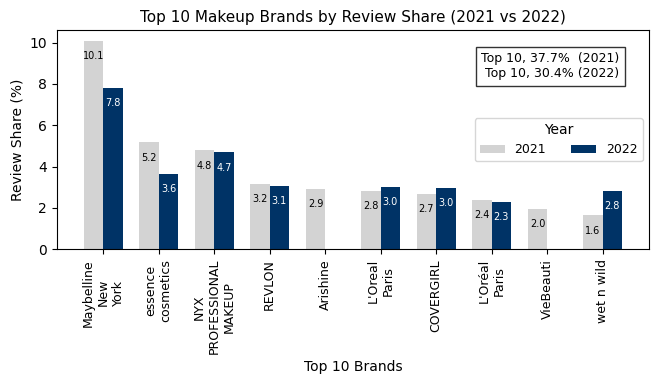

In [9]:
#. Makeup Top 10 brand share

# File paths for the 2021 and 2022 datasets
file_path_2021 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2021.parquet"
file_path_2022 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2022.parquet"

# Load only the necessary columns (brand, rating, Makeup)
necessary_columns = ['brand', 'rating', 'Makeup']
df_2021 = pd.read_parquet(file_path_2021, columns=necessary_columns)
df_2022 = pd.read_parquet(file_path_2022, columns=necessary_columns)

# Normalize brand names for consistency
def normalize_brands(df):
    df['brand'] = df['brand'].replace({"Loreal Paris": "L'Oréal Paris"})
    return df

# Normalize brands in both datasets
df_2021 = normalize_brands(df_2021)
df_2022 = normalize_brands(df_2022)

# Filter the data to include only makeup products (Makeup == 1)
df_2021_makeup = df_2021[df_2021['Makeup'] == 1]
df_2022_makeup = df_2022[df_2022['Makeup'] == 1]

# Function to calculate top 10 brands by rating share in the makeup category
def top_10_brand_rating_share(df):
    # Group by brand and calculate the total rating count per brand
    brand_ratings = df.groupby('brand')['rating'].sum().sort_values(ascending=False)
    
    # Calculate the total number of ratings for makeup
    total_makeup_ratings = brand_ratings.sum()
    
    # Calculate the rating share for each brand
    brand_rating_share = (brand_ratings / total_makeup_ratings) * 100
    
    # Get the top 10 brands
    top_10_brands = brand_rating_share.head(10)
    
    # Return the top 10 brands and their shares
    return top_10_brands

# Calculate the top 10 brands for 2021 and 2022
top_10_2021 = top_10_brand_rating_share(df_2021_makeup)
top_10_2022 = top_10_brand_rating_share(df_2022_makeup)

# Align the 2021 and 2022 data by using the top 10 brands from 2021
brands = top_10_2021.index.tolist()  # Using 2021's top 10 brands
top_10_2021_values = top_10_2021.values
top_10_2022_values = top_10_2022.reindex(brands).fillna(0).values  # Align 2022 data with 2021 brands

# Modify brand names to add line breaks for longer names
brands = [brand.replace(" ", "\n") if len(brand) > 10 else brand for brand in brands]

# Set up the bar width and x positions for each year
bar_width = 0.35
x = range(len(brands))  # X positions for each brand

# Set figure size to 17 cm x 10 cm (6.69 x 3.94 inches)
fig, ax = plt.subplots(figsize=(6.69, 3.94))  # 17 cm x 10 cm in inches

# Plot 2021 bars in gray
bars_2021 = ax.bar([i - bar_width/2 for i in x], top_10_2021_values, width=bar_width, label='2021', color='#d3d3d3')

# Plot 2022 bars in dark blue
bars_2022 = ax.bar([i + bar_width/2 for i in x], top_10_2022_values, width=bar_width, label='2022', color='#003366')

# Add data labels to each bar with a smaller font and offset slightly inward
for bar in bars_2021:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval - 0.5, f'{yval:.1f}', ha='center', va='top', fontsize=7, color='black')
for bar in bars_2022:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval - 0.5, f'{yval:.1f}', ha='center', va='top', fontsize=7, color='white')

# Calculate total cumulative share for 2021 and 2022
total_share_2021 = top_10_2021_values.sum()
total_share_2022 = top_10_2022_values.sum()

# Add cumulative share box slightly inward from the top-right corner
ax.text(0.95, 0.90, f'Top 10, {total_share_2021:.1f}%  (2021)\nTop 10, {total_share_2022:.1f}% (2022)', 
        transform=ax.transAxes, fontsize=9, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8))

# Add labels and title with moderate font size
ax.set_xlabel('Top 10 Brands', fontsize=10)
ax.set_ylabel('Review Share (%)', fontsize=10)
ax.set_title('Top 10 Makeup Brands by Review Share (2021 vs 2022)', fontsize=11)

# Set x-ticks and labels with a vertical orientation
ax.set_xticks(x)
ax.set_xticklabels(brands, rotation=90, ha='center', fontsize=9)

# Add legend in a single row inside the graph on the middle right
ax.legend(title="Year", loc='center right', bbox_to_anchor=(1, 0.5), ncol=2, fontsize=9, title_fontsize=10)

# Adjust layout for better appearance, prevent label overflow
plt.tight_layout()
plt.show()


C:\Users\seony\AppData\Local\Temp\ipykernel_29248\1781360182.py:46: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = category_seasonality.style.applymap(highlight_color)


,Nail Art & Polish,Face,Styling Products,Body,"Hair Extensions, Wigs & Accessories",Shave & Hair Removal,Eyes,Hair Accessories,Shampoo & Conditioner,Moisturizer,Lips,Deodorants & Antiperspirants,Sunscreens & Tanning Products,Bath,Hair Coloring Products,Foot & Hand Care,Hair Cutting Tools,Nail Care,Piercing & Tattoo Supplies,Oral Care,Makeup,Skin Care
Month,,,,,,,,,,,,,,,,,,,,,,
1,93,95,115,107,87,107,101,95,96,110,101,85,51,118,90,130,115,102,74,123,96,100
2,79,86,93,88,74,84,91,73,85,97,80,69,52,97,80,109,95,94,71,79,83,86
3,99,106,108,103,100,95,110,91,104,112,100,85,84,112,96,118,114,102,108,115,104,104
4,92,100,99,96,93,89,104,87,95,101,94,92,105,101,97,100,108,105,109,136,98,100
5,90,99,95,96,90,87,95,92,93,97,95,95,129,98,94,96,101,104,108,96,95,100
6,88,95,90,92,86,85,90,91,93,92,87,103,154,91,96,88,92,99,116,102,93,97
7,108,108,104,107,99,99,100,112,107,105,101,118,175,100,103,96,100,103,123,91,105,112
8,112,114,107,114,103,114,109,120,120,110,108,127,151,104,119,99,111,107,110,112,113,116
9,104,101,97,99,100,105,98,108,109,96,102,119,103,92,102,82,101,107,101,94,101,99


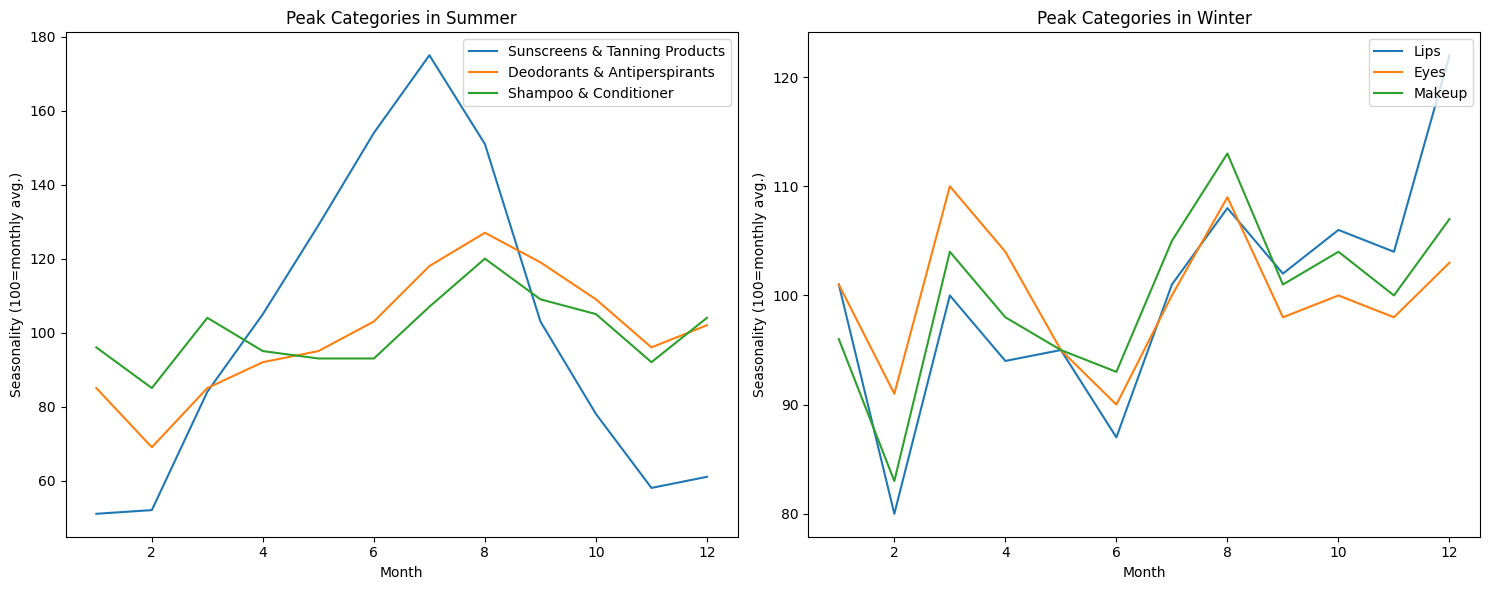

In [17]:
#. Seasonality by Category

# File path for the 2022 dataset
file_path_2022 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2022.parquet"

# Load necessary columns (including timestamp for month extraction)
category_columns = ['Nail Art & Polish', 'Face', 'Styling Products', 'Body', 
                    'Hair Extensions, Wigs & Accessories', 'Shave & Hair Removal', 
                    'Eyes', 'Hair Accessories', 'Shampoo & Conditioner', 'Moisturizer', 
                    'Lips', 'Deodorants & Antiperspirants', 'Sunscreens & Tanning Products', 
                    'Bath', 'Hair Coloring Products', 'Foot & Hand Care', 'Hair Cutting Tools', 
                    'Nail Care', 'Piercing & Tattoo Supplies', 'Oral Care', 'Makeup', 'Skin Care', 'rating', 'timestamp']

# Load the dataset
df_2022 = pd.read_parquet(file_path_2022, columns=category_columns)

# Convert timestamp from milliseconds to seconds by dividing by 1000
df_2022['timestamp'] = df_2022['timestamp'] // 1000

# Create a 'Month' column from the 'timestamp'
df_2022['Month'] = pd.to_datetime(df_2022['timestamp'], unit='s').dt.month

# Multiply each category's indicator by the rating to get the total reviews per category
for category in category_columns[:-2]:  
    df_2022[category] = df_2022[category] * df_2022['rating']

# Group by 'Month' and calculate the sum of ratings for each category
monthly_category_reviews = df_2022.groupby('Month')[category_columns[:-2]].sum()

# Calculate the monthly percentage (seasonality) for each category and round to integer (no decimals)
category_seasonality = monthly_category_reviews.apply(lambda x: (x / x.mean()) * 100).round(0).astype(int)

# Styling function for Jupyter Notebook
def highlight_color(val):
    color = ''
    if val >= 115:
        color = 'background-color: pink'
    elif val <= 85:
        color = 'background-color: lightgreen'
    return color

# Apply highlighting
styled_df = category_seasonality.style.applymap(highlight_color)

# Display the styled DataFrame in Jupyter (Jupyter-specific output)
display(styled_df)

# Plotting line graphs for seasonality by category
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left graph: Peak Categories in Summer
summer_categories = ['Sunscreens & Tanning Products', 'Deodorants & Antiperspirants', 'Shampoo & Conditioner']
for category in summer_categories:
    ax1.plot(category_seasonality.index, category_seasonality[category], label=category)
ax1.set_title("Peak Categories in Summer")
ax1.set_xlabel("Month")
ax1.set_ylabel("Seasonality (100=monthly avg.)")
ax1.legend(loc='upper right')  # Place legend in the upper right

# Right graph: Peak Categories in Winter
winter_categories = ['Lips', 'Eyes', 'Makeup']
for category in winter_categories:
    ax2.plot(category_seasonality.index, category_seasonality[category], label=category)
ax2.set_title("Peak Categories in Winter")
ax2.set_xlabel("Month")
ax2.set_ylabel("Seasonality (100=monthly avg.)")
ax2.legend(loc='upper right')  # Place legend in the upper right

# Display the plots
plt.tight_layout()
plt.show()


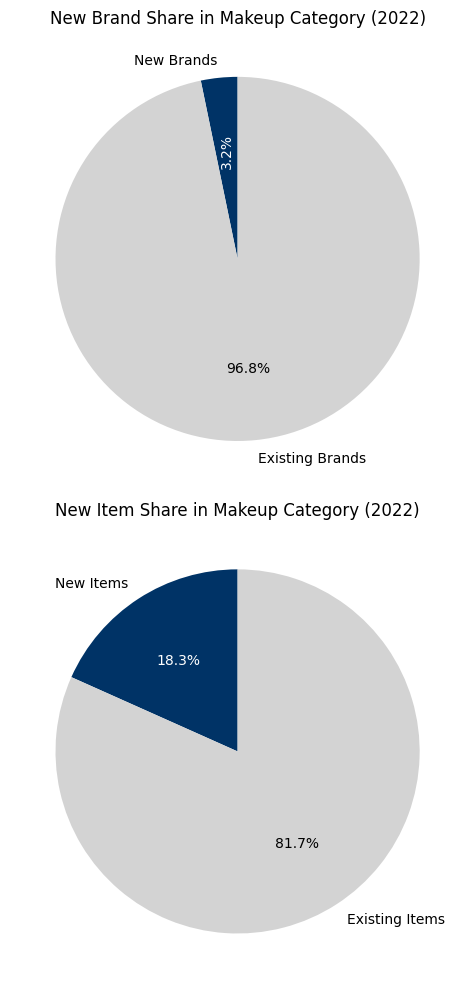

In [10]:
# New brand/item share in Makeup category

# File paths for the 2021 and 2022 datasets
file_path_2021 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2021.parquet"
file_path_2022 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2022.parquet"

# Load only the necessary columns (asin, brand, rating, Makeup)
necessary_columns = ['asin', 'brand', 'rating', 'Makeup']
df_2021 = pd.read_parquet(file_path_2021, columns=necessary_columns)
df_2022 = pd.read_parquet(file_path_2022, columns=necessary_columns)

# Filter data to include only 'Makeup' category products (Makeup == 1)
df_2021_makeup = df_2021[df_2021['Makeup'] == 1]
df_2022_makeup = df_2022[df_2022['Makeup'] == 1]

# Get unique ASINs and brands from the 2021 "Makeup" data
existing_asins_2021 = set(df_2021_makeup['asin'].unique())
existing_brands_2021 = set(df_2021_makeup['brand'].unique())

# Filter 2022 "Makeup" data to find new items and new brands
new_items_2022 = df_2022_makeup[~df_2022_makeup['asin'].isin(existing_asins_2021)]
new_brands_2022 = df_2022_makeup[~df_2022_makeup['brand'].isin(existing_brands_2021)]

# Calculate total ratings for "Makeup" category in 2022
total_ratings_2022 = df_2022_makeup['rating'].sum()

# Calculate the ratings and rating share for new items and existing items in 2022
new_items_ratings_2022 = new_items_2022['rating'].sum()
existing_items_ratings_2022 = total_ratings_2022 - new_items_ratings_2022

# Calculate the ratings and rating share for new brands and existing brands in 2022
new_brands_ratings_2022 = new_brands_2022['rating'].sum()
existing_brands_ratings_2022 = total_ratings_2022 - new_brands_ratings_2022

# Data for pie charts
labels_items = ['New Items', 'Existing Items']
sizes_items = [new_items_ratings_2022, existing_items_ratings_2022]
colors_items = ['#003366', '#d3d3d3']  # Dark blue for New, Gray for Existing

labels_brands = ['New Brands', 'Existing Brands']
sizes_brands = [new_brands_ratings_2022, existing_brands_ratings_2022]
colors_brands = ['#003366', '#d3d3d3']  # Dark blue for New, Gray for Existing

# Plotting the pie charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))  # Vertically stacked pie charts

# Pie chart for New vs Existing Brands with vertical label for the blue segment
wedges, texts, autotexts = ax1.pie(
    sizes_brands, labels=labels_brands, autopct='%1.1f%%', startangle=90, colors=colors_brands)

# Set label color and rotation for each segment
for i, autotext in enumerate(autotexts):
    if colors_brands[i] == '#003366':  # Blue segment
        autotext.set_color('white')
        autotext.set_rotation(90)  # Set text vertically
    else:
        autotext.set_color('black')
ax1.set_title("New Brand Share in Makeup Category (2022)")

# Pie chart for New vs Existing Items
wedges, texts, autotexts = ax2.pie(
    sizes_items, labels=labels_items, autopct='%1.1f%%', startangle=90, colors=colors_items)

# Set label color for the blue and gray segments in the second pie chart
for i, autotext in enumerate(autotexts):
    autotext.set_color('white' if colors_items[i] == '#003366' else 'black')
ax2.set_title("New Item Share in Makeup Category (2022)")

# Adjust layout
plt.tight_layout()
plt.show()



Loading 2021 data...
Loading 2022 data...
                               Category  Price-Rating Correlation  \
0                     Nail Art & Polish                  0.034367   
1                                  Face                  0.023938   
2                      Styling Products                  0.003332   
3                                  Body                  0.006671   
4   Hair Extensions, Wigs & Accessories                  0.039753   
5                  Shave & Hair Removal                 -0.014842   
6                                  Eyes                  0.066055   
7                      Hair Accessories                  0.072023   
8                 Shampoo & Conditioner                  0.004935   
9                           Moisturizer                  0.011209   
10                                 Lips                  0.047504   
11         Deodorants & Antiperspirants                 -0.031921   
12        Sunscreens & Tanning Products                  0.03

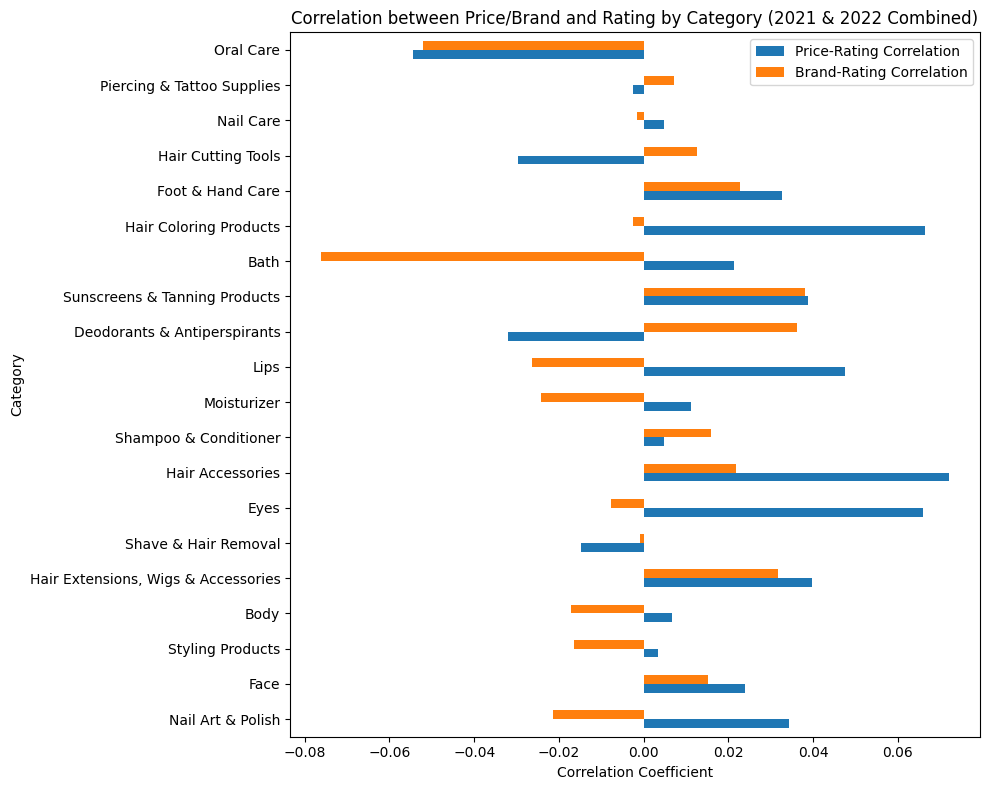

In [14]:
#. Correlation between brand, price and rating score(Y2022)

# File paths for the 2021 and 2022 datasets
file_path_2021 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2021.parquet"
file_path_2022 = "C:\\Users\\seony\\Desktop\\DA Group\\beauty_merged_2022.parquet"

# Load necessary columns including 'brand', 'price', 'rating' and category columns
columns_to_load = ['brand', 'price', 'rating', 'Nail Art & Polish', 'Face', 'Styling Products', 'Body', 
                   'Hair Extensions, Wigs & Accessories', 'Shave & Hair Removal', 'Eyes', 'Hair Accessories', 
                   'Shampoo & Conditioner', 'Moisturizer', 'Lips', 'Deodorants & Antiperspirants', 
                   'Sunscreens & Tanning Products', 'Bath', 'Hair Coloring Products', 'Foot & Hand Care', 
                   'Hair Cutting Tools', 'Nail Care', 'Piercing & Tattoo Supplies', 'Oral Care']

# Load the datasets
print("Loading 2021 data...")
df_2021 = pd.read_parquet(file_path_2021, columns=columns_to_load)
print("Loading 2022 data...")
df_2022 = pd.read_parquet(file_path_2022, columns=columns_to_load)

# Combine both datasets to analyze the combined correlation
df_combined = pd.concat([df_2021, df_2022])

# Function to calculate correlation for each category
def calculate_correlation(df, category):
    # Filter data where category is present (where the category column is 1)
    df_category = df[df[category] == 1]
    
    # Dropping rows with missing price or rating values
    df_category = df_category.dropna(subset=['price', 'rating'])

    # Calculate correlation between price and rating
    corr_price_rating = df_category['price'].corr(df_category['rating'])

    # Calculate correlation between brand and rating by encoding brand names
    df_category['brand_encoded'] = pd.factorize(df_category['brand'])[0]
    corr_brand_rating = df_category['brand_encoded'].corr(df_category['rating'])

    return corr_price_rating, corr_brand_rating

# Prepare a DataFrame to store the correlation results
correlation_results = pd.DataFrame(columns=['Category', 'Price-Rating Correlation', 'Brand-Rating Correlation'])

# Loop over each category to calculate the correlations
category_columns = ['Nail Art & Polish', 'Face', 'Styling Products', 'Body', 
                   'Hair Extensions, Wigs & Accessories', 'Shave & Hair Removal', 'Eyes', 'Hair Accessories', 
                   'Shampoo & Conditioner', 'Moisturizer', 'Lips', 'Deodorants & Antiperspirants', 
                   'Sunscreens & Tanning Products', 'Bath', 'Hair Coloring Products', 'Foot & Hand Care', 
                   'Hair Cutting Tools', 'Nail Care', 'Piercing & Tattoo Supplies', 'Oral Care']

# List to hold the dataframes for each category
correlation_list = []

for category in category_columns:
    corr_price_rating, corr_brand_rating = calculate_correlation(df_combined, category)
    # Create a DataFrame for the current category
    df_corr = pd.DataFrame({
        'Category': [category],
        'Price-Rating Correlation': [corr_price_rating],
        'Brand-Rating Correlation': [corr_brand_rating]
    })
    # Append the DataFrame to the list
    correlation_list.append(df_corr)

# Concatenate all the individual DataFrames into the final correlation results DataFrame
correlation_results = pd.concat(correlation_list, ignore_index=True)

# Display the correlation results
print(correlation_results)

# Plotting the correlation results for visualization (horizontal bar graph)
fig, ax = plt.subplots(figsize=(10, 8))
correlation_results.set_index('Category')[['Price-Rating Correlation', 'Brand-Rating Correlation']].plot(kind='barh', ax=ax)
ax.set_title('Correlation between Price/Brand and Rating by Category (2021 & 2022 Combined)')
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Category')
plt.tight_layout()
plt.show()
